In [1]:
import warnings as wrn #Import warnings from library
wrn.filterwarnings('ignore')

In [2]:
import pandas as pn #Import pandas from library
import matplotlib.pyplot as plt #Import Matplotlib to get the plot

In [3]:
df = pn.read_excel("Height-Weight Data.csv.xlsx") #downlaod Excel file in panda

In [5]:
df.head(5) #Check first 5 data

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.tail(5) #Check last 5 data

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [10]:
df.shape # Check row and column 

(3501, 2)

In [11]:
df.isnull().sum() #Check if there is any empty data from the document

Height    0
Weight    0
dtype: int64

In [12]:
df.info() #check data type, column name, and null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


Text(0.5, 1.0, 'Height - Weight Plot')

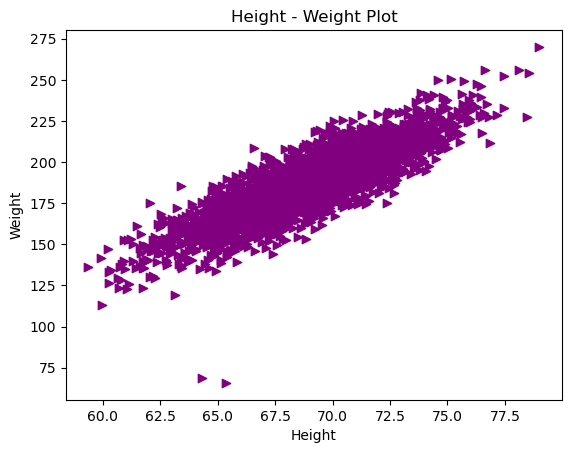

In [17]:
plt.scatter(df.Height,df.Weight, color = 'purple', marker = '>') #check datas with x, and y
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height - Weight Plot') 

In [18]:
df.Height.mean()

69.02441087268797

In [20]:
df.Weight.mean()

186.89125797946284

In [23]:
x = df[['Height']] #df.drop('Weight', axis = 1)

In [24]:
y = df[['Weight']] #df.drop('Height', axis = 1)

In [25]:
y.head(5)

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [26]:
x.head(5)

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [27]:
from sklearn.linear_model import LinearRegression #Import LR from SKLearn library

In [28]:
reg = LinearRegression() #Creating object for LR

In [29]:
reg

LinearRegression()

In [31]:
reg.fit(x,y) #Training the Model

LinearRegression()

In [32]:
reg.coef_ #Coefficient (m) for LR

array([[5.95843786]])

In [34]:
reg.intercept_ # Error (e) for LR

array([-224.38640537])

In [36]:
reg.predict([[72.738970]]) #Predict LR value (y)

array([[209.02422774]])

In [37]:
reg.predict([[71.730978]]) #Predict LR value (y)

array([[203.01817003]])

#We know, y=m*x+c

In [39]:
result = ((reg.coef_)*71.730978) + (reg.intercept_)
result #Theoretically find the value of (y)

array([[203.01817003]])

In [41]:
reg.predict(x)

array([[215.62645706],
       [185.44629614],
       [217.19405276],
       ...,
       [216.01692618],
       [177.18859679],
       [209.02422774]])

In [42]:
df['Predicted_Weight'] = reg.predict(x)

In [45]:
df.head(5)

,Height,Weight,Predicted_Weight
0,73.847017,241.893563,215.626457
1,68.781904,162.310473,185.446296
2,74.110105,212.740856,217.194053
3,71.730978,220.042470,203.018172
4,69.881796,206.349801,191.999933


In [44]:
df.tail(5)

,Height,Weight,Predicted_Weight
3496,69.296830,185.649086,188.514450
3497,70.542201,210.198845,195.934919
3498,73.912549,202.429960,216.016926
3499,67.396021,144.277671,177.188597
3500,72.738970,187.222909,209.024228


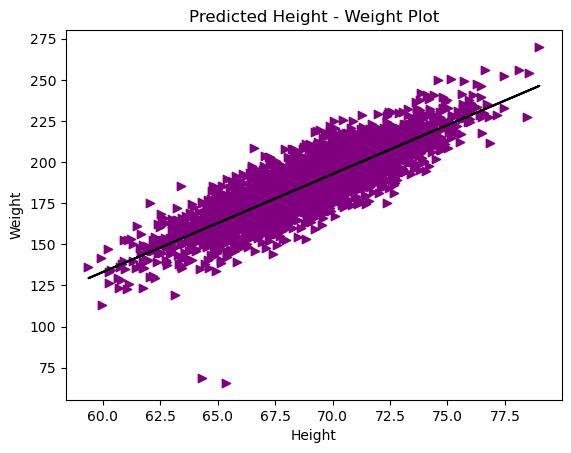

In [55]:
plt.plot(df.Height, reg.predict(df[['Height']]), color = 'black') #create the best fit line 
plt.scatter(df.Height,df.Weight, color = 'purple', marker = '>')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Predicted Height - Weight Plot')
plt.savefig('linearReg1.png')

In [56]:
reg.score(x,y) # Training accuracy by percentage

0.7323584758139253

In [59]:
from sklearn.metrics import mean_squared_error #Import MSE from SKLearn library

In [60]:
mean_squared_error(x,df.Predicted_Weight) #Require to compare different plots accuracy

14093.441594098931